<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


/tmp/ipykernel_548/3074744261.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='viridis')


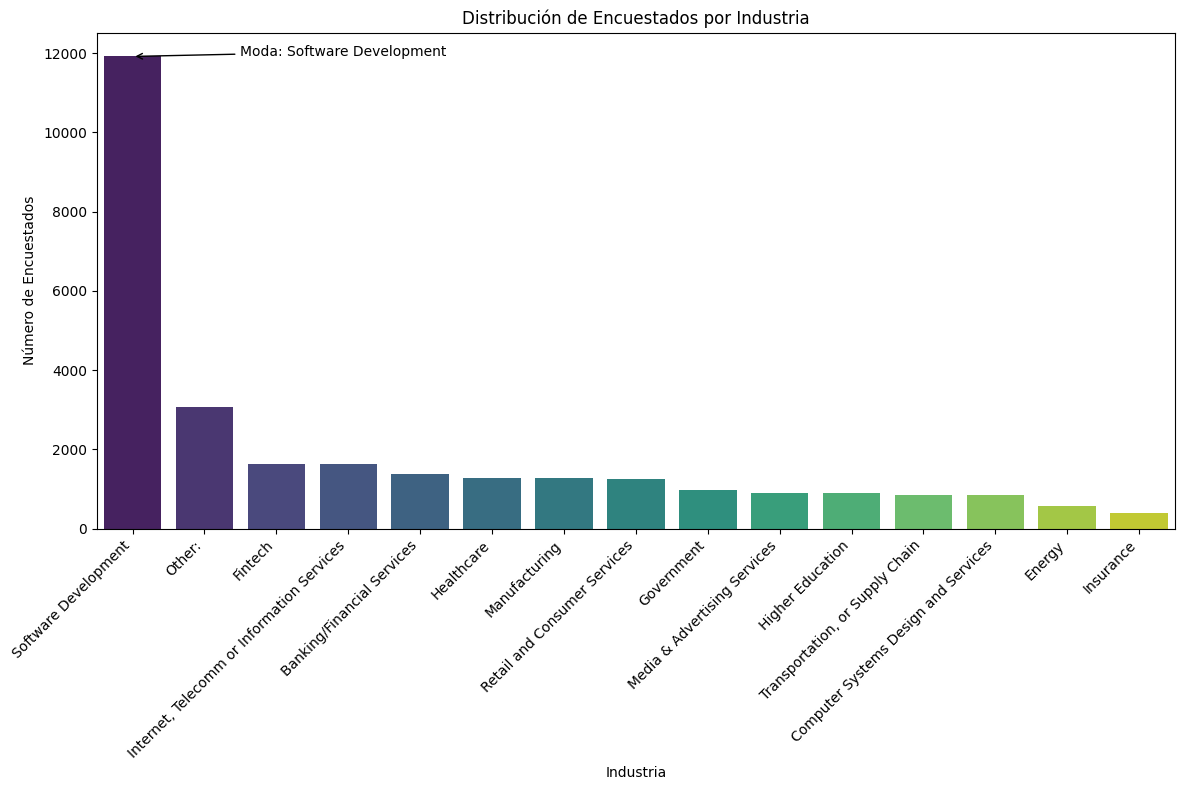

In [3]:
# Contar el número de encuestados por industria
industry_counts = df['Industry'].value_counts()

# Crear el gráfico de barras con más altura
plt.figure(figsize=(12,8))
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Encuestados por Industria')
plt.xlabel('Industria')
plt.ylabel('Número de Encuestados')

# Identificar la moda
moda = industry_counts.idxmax()
moda_valor = industry_counts.max()
moda_index = list(industry_counts.index).index(moda)

# Anotación desplazada hacia la derecha
plt.annotate('Moda: Software Development',
             xy=(moda_index, moda_valor),
             xytext=(moda_index + 1.5, moda_valor + 15),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10,
             color='black')

plt.tight_layout()
plt.show()



<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
# Calcular estadísticas básicas
mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()
std_comp = df['ConvertedCompYearly'].std()

print(f"Media: {mean_comp:.2f}")
print(f"Mediana: {median_comp:.2f}")
print(f"Desviación estándar: {std_comp:.2f}")

# Definir el umbral para valores atípicos altos (3 desviaciones estándar por encima de la media)
threshold = mean_comp + 3 * std_comp

# Filtrar los valores atípicos
high_outliers = df[df['ConvertedCompYearly'] > threshold]

print(f"\nNúmero de valores atípicos por compensación alta: {len(high_outliers)}")
high_outliers[['ConvertedCompYearly']].head()


Media: 86155.29
Mediana: 65000.00
Desviación estándar: 186756.97

Número de valores atípicos por compensación alta: 89


,ConvertedCompYearly
529,650000.0
828,1000000.0
1932,945000.0
2171,750000.0
2187,2000000.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1 (25%): 32712.00
Q3 (75%): 107971.50
IQR: 75259.50
Límite inferior: -80177.25
Límite superior: 220860.75

Número de valores atípicos detectados por IQR: 978


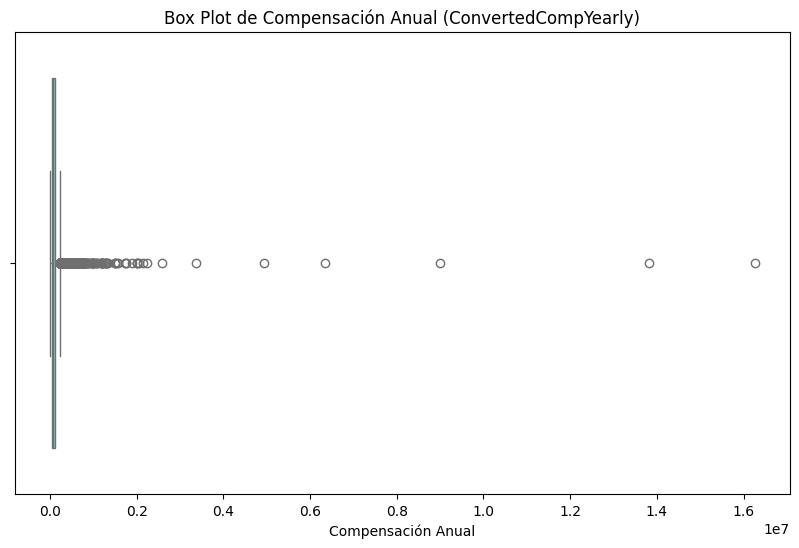

In [5]:
# Eliminar valores nulos para evitar errores
comp_data = df['ConvertedCompYearly'].dropna()

# Calcular cuartiles
Q1 = comp_data.quantile(0.25)
Q3 = comp_data.quantile(0.75)
IQR = Q3 - Q1

# Determinar límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25%): {Q1:.2f}")
print(f"Q3 (75%): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Límite inferior: {lower_bound:.2f}")
print(f"Límite superior: {upper_bound:.2f}")

# Filtrar valores atípicos
outliers_iqr = comp_data[(comp_data < lower_bound) | (comp_data > upper_bound)]
print(f"\nNúmero de valores atípicos detectados por IQR: {len(outliers_iqr)}")

# Visualizar con box plot
plt.figure(figsize=(10,6))
sns.boxplot(x=comp_data, color='skyblue')
plt.title('Box Plot de Compensación Anual (ConvertedCompYearly)')
plt.xlabel('Compensación Anual')
plt.show()



<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [6]:
# Eliminar valores nulos para evitar errores
comp_data = df['ConvertedCompYearly'].dropna()

# Calcular cuartiles e IQR
Q1 = comp_data.quantile(0.25)
Q3 = comp_data.quantile(0.75)
IQR = Q3 - Q1

# Definir límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Crear nuevo DataFrame sin valores atípicos
df_clean = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Validar el tamaño del nuevo DataFrame
print(f"Tamaño original: {df.shape[0]} filas")
print(f"Tamaño sin outliers: {df_clean.shape[0]} filas")
print(f"Filas eliminadas: {df.shape[0] - df_clean.shape[0]}")


Tamaño original: 65437 filas
Tamaño sin outliers: 22457 filas
Filas eliminadas: 42980


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [7]:
# Mostrar los valores únicos en la columna Age
df['Age'].unique()


array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

In [8]:
# Calcular la moda de la columna Age en df
age_mode = df['Age'].mode()[0]

# Reemplazar "Prefer not to say" por la moda
df['Age'] = df['Age'].replace('Prefer not to say', age_mode)

# Reemplazar valores nulos por la moda
df['Age'] = df['Age'].fillna(age_mode)


In [9]:
print(df['Age'].value_counts())
print(f"Valores nulos restantes: {df['Age'].isna().sum()}")


Age
25-34 years old       24233
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Name: count, dtype: int64
Valores nulos restantes: 0


In [10]:
# Mapeo de rangos de edad a valores numéricos aproximados (valor medio del rango)
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

# Aplicar el mapeo al DataFrame original
df['AgeNumeric'] = df['Age'].map(age_map)


In [11]:
# Seleccionar columnas numéricas incluyendo la nueva columna AgeNumeric
numeric_df = df.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()


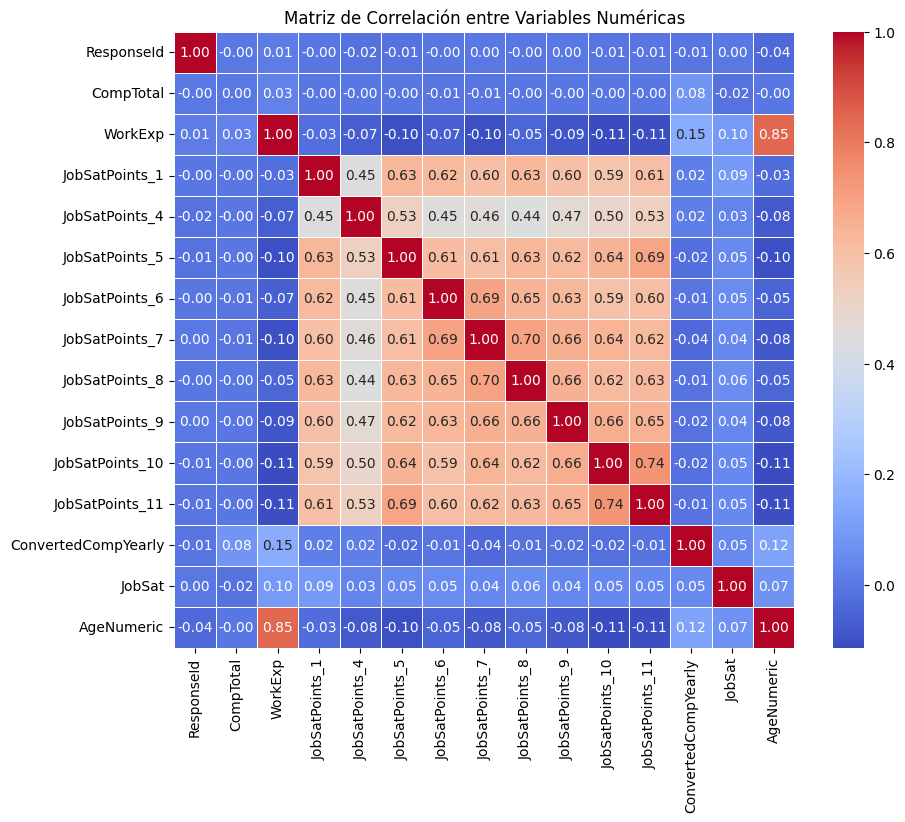

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
